# 서포트 벡터 머신 (SVM, Support Vector Machine)

In [ ]:
from sklearn import svm, datasets
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## 데이터 가공

In [ ]:
import pandas as pd

dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=['target'])
print('features :', dfX.shape)
print('label :', dfy.shape)

features : (569, 30)
label : (569, 1)


In [ ]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
dfX.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 결측치 처리

In [ ]:
dfX.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### 데이터 준비

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


### 데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

## 학습

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
X_test = sc.transform(X_test)
y_test = y_test.values.flatten()
# flatten : 다차원 배열 공간을 1차원으로 평탄화해주는 함수

In [ ]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

## 성능 평가

### 혼동행렬

[Text(33.0, 0.5, 'Actual'), Text(0.5, 33.0, 'Prediction')]

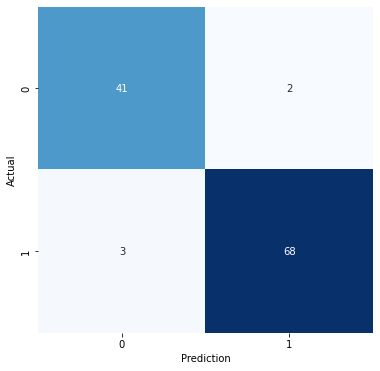

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
s = sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')

In [ ]:
from sklearn.metrics import *

print('accuracy_score: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('precision_score: {0:.4f}'.format(precision_score(y_test, y_pred)))
print('recall_score: {0:.4f}'.format(recall_score(y_test, y_pred)))


accuracy_score: 0.9561
precision_score: 0.9714
recall_score: 0.9577


# KNN 과 비교하기

## 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

## 예측

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


## 성능평가

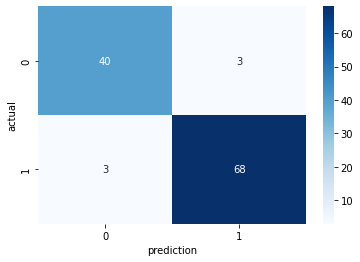

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
s = sns.heatmap(cf, annot=True, cmap='Blues')
s.set(xlabel='prediction', ylabel='actual')
plt.show()

In [ ]:
from sklearn.metrics import *

# 정확도 Accuracy : 전체 데이터 수 중 예측 결과와 실제 값이 동일한 건수(TN + TP)가 차지하는 비율 
acc = accuracy_score(y_test, y_pred)
print(f"정확도 : {acc}")

# 재현율 Precision : 맞다고 예측한것 중, 실제로 얼마나 true positive 가 많은가 (= 즉, positive 예측을 얼마나 맞췄냐)
pre = precision_score(y_test, y_pred, average='macro')
print(f"재현율 : {pre}")

# 정밀도 Recall : actual positive (= true pos, false neg) 중에, 우리가 얼마나 맞게 예측을 했는가
recall = recall_score(y_test, y_pred, average='macro')
print(f"정밀도 : {recall}")

정확도 : 0.9473684210526315
재현율 : 0.9439895185063871
정밀도 : 0.9439895185063871
